In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [2]:
def resize(frame, scale=0.5):
    height = int(frame.shape[0] * scale)
    width = int(frame.shape[1] * scale)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)

In [3]:
img1 = cv2.imread('image/tom1.jpg')
img1 = resize(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY))
img2 = cv2.imread('image/tom2.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

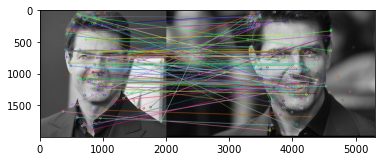

(400, 400)


In [29]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, img2)
plt.imshow(resize(img3, 5))
plt.show()
print(img1.shape)

In [43]:
train_data_dir = 'train/'
test_data_dir = 'test/'
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
train_datagen = image.ImageDataGenerator(
    rescale= 1,
    shear_range= 0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip= True,
    fill_mode= 'nearest',
    width_shift_range= 5,
    height_shift_range= 5,
    vertical_flip= True
)
test_datagen = image.ImageDataGenerator(rescale=1/255.0)

In [71]:
train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    color_mode= 'grayscale',
    target_size= (48, 48),
    batch_size= 32,
    class_mode= 'categorical',
    shuffle= False
)

test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


34
34


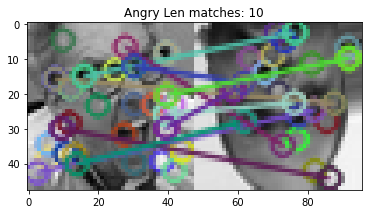

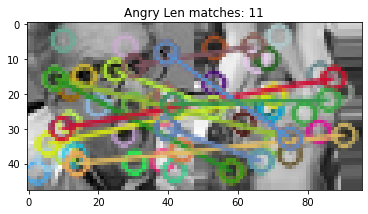

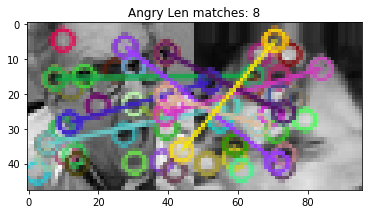

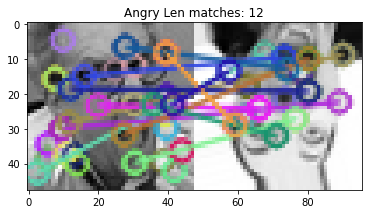

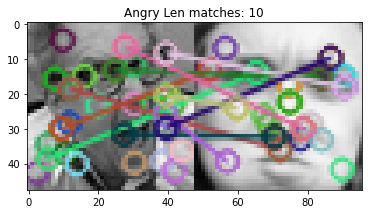

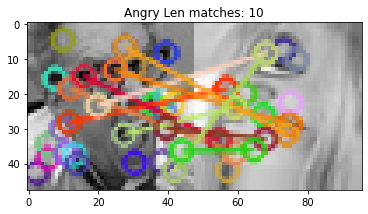

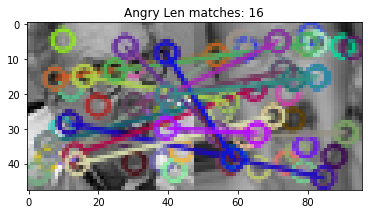

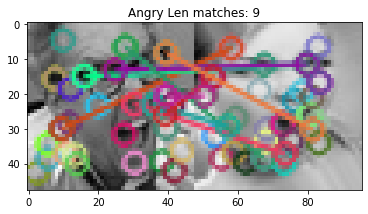

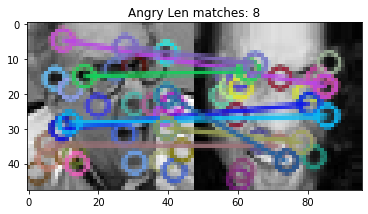

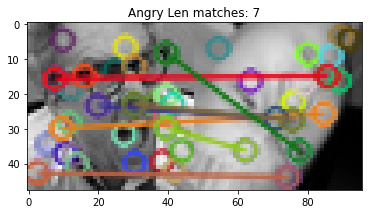

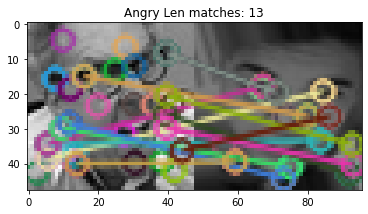

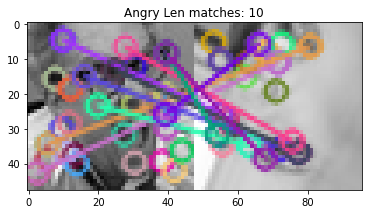

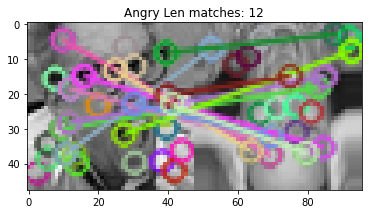

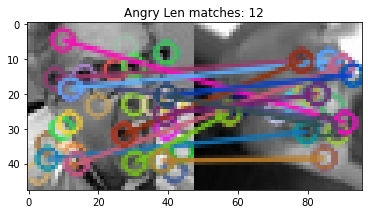

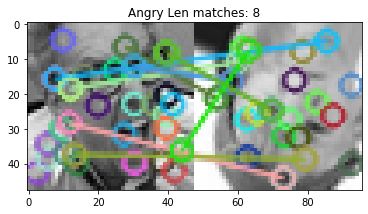

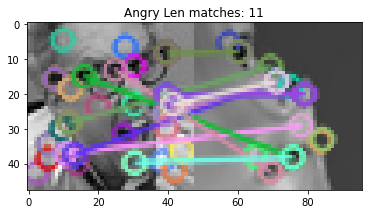

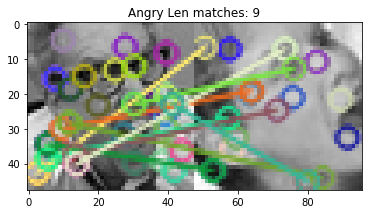

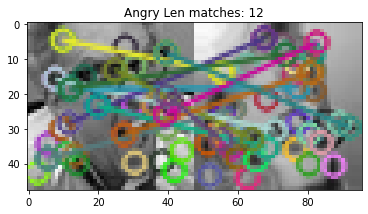

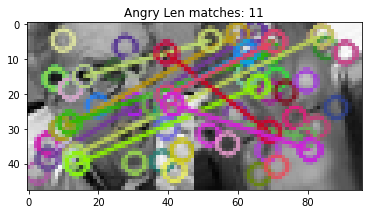

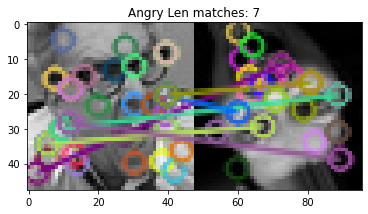

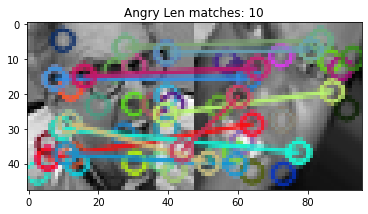

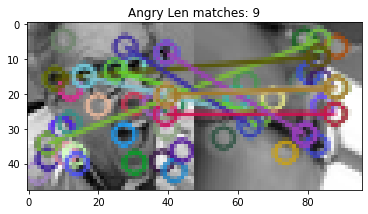

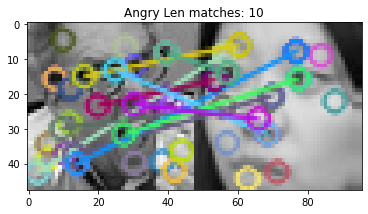

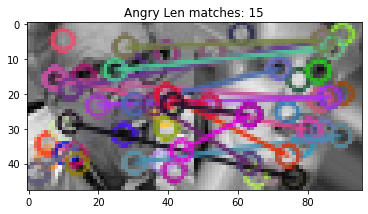

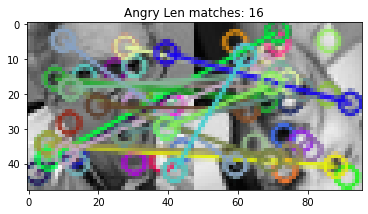

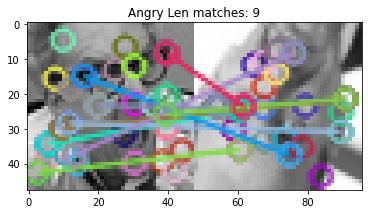

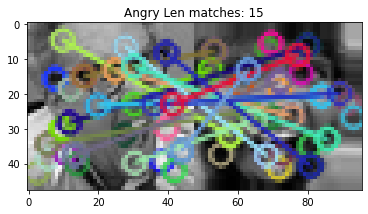

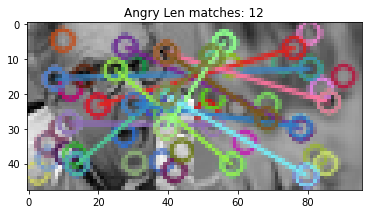

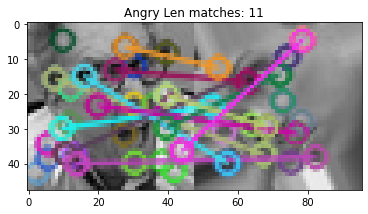

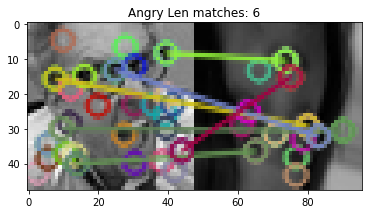

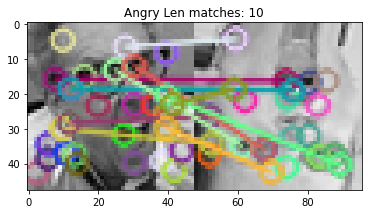

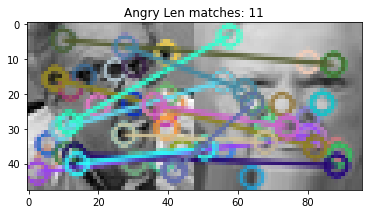

In [74]:
angry = cv2.imread('train/angry/Training_3908.jpg')
kpa, desa = sift.detectAndCompute(angry, None)
print(len(desa))
print(len(kpa))
img, label = train_generator.next()
for ele_img, ele_label in zip(img, label):
    ele_img = ele_img.astype('uint8')
    kpoint, desc = sift.detectAndCompute(ele_img, None)
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = bf.match(desa, desc)
    image = cv2.drawMatches(angry, kpa, ele_img, kpoint, matches, ele_img)
    plt.imshow(image, cmap='gray')
    plt.title(labels[np.argmax(ele_label)] + f' Len matches: {len(matches)}')
    plt.show()

